## Lasso Regression algorithm

### Lasso regression is a regularization set of rules which may be used to remove irrelevant noises and do characteristic choice and subsequently regularize a model.

The word “LASSO” stands for Least Absolute Shrinkage and Selection Operator. It is a statistical formula for the regularisation of data models and feature selection.Lasso Regression uses L1 regularization technique (will be discussed later in this article). It is used when we have more number of features because it automatically performs feature selection.

*Lasso regression penalizes less important features of your dataset and makes their respective coefficients zero, thereby eliminating them. Thus it provides you with the benefit of feature selection and simple model creation. 
So, if the dataset has high dimensionality and high correlation, lasso regression can be used.*

## Implementation of Lasso regression

### Import Required Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import warnings; warnings.simplefilter('ignore')

### Load the Dataset

In [8]:
df = pd.read_csv("C:/Users/S_The/Downloads/Auto.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [9]:
df = df.iloc[0:200]
df = df.drop(['name'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           200 non-null    float64
 1   cylinders     200 non-null    int64  
 2   displacement  200 non-null    float64
 3   horsepower    200 non-null    object 
 4   weight        200 non-null    int64  
 5   acceleration  200 non-null    float64
 6   year          200 non-null    int64  
 7   origin        200 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 12.6+ KB


In [10]:
df['origin'] = pd.Categorical(df['origin'])
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
print(df.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      2
weight          0
acceleration    0
year            0
origin          0
dtype: int64


In [11]:
df = df.dropna()

### Standardization

**It is important to standardize the features by removing the mean and scaling to unit variance.If a feature has a variance that is orders of magnitude larger that others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.**

In [12]:
dfs = df.astype('int')
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 199
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   mpg           198 non-null    int32
 1   cylinders     198 non-null    int32
 2   displacement  198 non-null    int32
 3   horsepower    198 non-null    int32
 4   weight        198 non-null    int32
 5   acceleration  198 non-null    int32
 6   year          198 non-null    int32
 7   origin        198 non-null    int32
dtypes: int32(8)
memory usage: 7.7 KB


In [13]:
dfs.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dfs[['cylinders', 'displacement', 'horsepower',
     'weight', 'acceleration', 'year', 'origin']] = scaler.fit_transform(dfs[['cylinders',
                                                                              'displacement',
                                                                              'horsepower',
                                                                              'weight',
                                                                              'acceleration',
                                                                              'year', 'origin']])

In [15]:
dfs.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18,1.179744,0.726091,0.325216,0.346138,-0.955578,-1.516818,-0.629372
1,15,1.179744,1.100254,1.129264,0.548389,-1.305309,-1.516818,-0.629372
2,18,1.179744,0.821807,0.784672,0.273370,-1.305309,-1.516818,-0.629372
3,16,1.179744,0.699986,0.784672,0.270160,-0.955578,-1.516818,-0.629372
4,17,1.179744,0.682583,0.554944,0.287282,-1.655041,-1.516818,-0.629372


In [16]:
X = dfs.drop(['mpg'], axis=1)
y = dfs['mpg']

### Split data

**Split the data set into train and test sets (use X_train, X_test, y_train, y_test), with the first 75% of the data for training and the remaining for testing.**

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

## Lasso regression

**Apply Lasso regression on the training set with the regularization parameter lambda = 0.5 and print the R^2-score for the training and test set. Comment on your findings.**

In [18]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=0.5)
reg.fit(X_train, y_train)

Lasso(alpha=0.5)

In [19]:
print('Lasso Regression: R^2 score on training set', reg.score(X_train, y_train)*100)
print('Lasso Regression: R^2 score on test set', reg.score(X_test, y_test)*100)

Lasso Regression: R^2 score on training set 82.49741060950073
Lasso Regression: R^2 score on test set 85.49734440925532


### Lasso with different lambdas

*Apply the Lasso regression on the training set with the following λ parameters: (0.001, 0.01, 0.1, 0.5, 1, 2, 10). Evaluate the R^2 score for all the models you obtain on both the train and test sets.*

In [20]:
lambdas = (0.001, 0.01, 0.1, 0.5, 1, 2, 10)
l_num = 7
pred_num = X.shape[1]

# prepare data for enumerate
coeff_a = np.zeros((l_num, pred_num))
train_r_squared = np.zeros(l_num)
test_r_squared = np.zeros(l_num)

In [21]:
for ind, i in enumerate(lambdas):    
    reg = Lasso(alpha = i)
    reg.fit(X_train, y_train)

    coeff_a[ind,:] = reg.coef_
    train_r_squared[ind] = reg.score(X_train, y_train)
    test_r_squared[ind] = reg.score(X_test, y_test)

### Plot values as a function of lambda

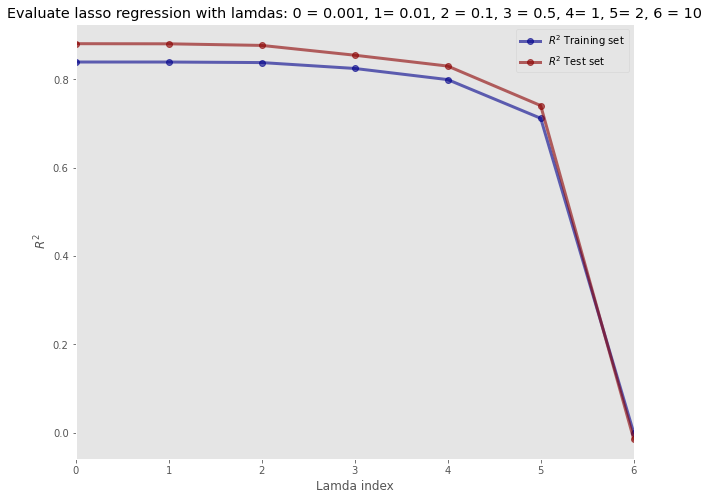

In [23]:
plt.figure(figsize=(10, 8))
plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", alpha=0.6, linewidth=3)
plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", alpha=0.6, linewidth=3)
plt.xlabel('Lamda index'); plt.ylabel(r'$R^2$')
plt.xlim(0, 6)
plt.title(r'Evaluate lasso regression with lamdas: 0 = 0.001, 1= 0.01, 2 = 0.1, 3 = 0.5, 4= 1, 5= 2, 6 = 10')
plt.legend(loc='best')
plt.grid()

### Identify best lambda and coefficients

*Store your test data results in a DataFrame and indentify the lambda where the R^2 has it’s maximum value in the test data. Fit a Lasso model with this lambda parameter (use the training data) and obtain the corresponding regression coefficients. Furthermore, obtain the mean squared error for the test data of this model.*

In [24]:
df_lam = pd.DataFrame(test_r_squared*100, columns=['R_squared'])
df_lam['lambda'] = (lambdas)
# returns the index of the row where column has maximum value.
df_lam.loc[df_lam['R_squared'].idxmax()]

R_squared    88.105773
lambda        0.001000
Name: 0, dtype: float64

In [25]:
# Coefficients of best model
reg_best = Lasso(alpha = 0.1)
reg_best.fit(X_train, y_train)
reg_best.coef_

array([-0.35554113, -1.13104696, -0.00596296, -3.31741775, -0.        ,
        0.37914648,  0.74902885])

In [26]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, reg_best.predict(X_test))

3.5862495928073472

### Cross Validation

*Evaluate the performance of a Lasso regression for different regularization parameters λ using 5-fold cross validation on the training set (module: from sklearn.model_selection import cross_val_score) and plot the cross-validation (CV) R2scores of the training and test data as a function of λ.*

In [27]:
l_min = 0.05
l_max = 0.2
l_num = 20
lambdas = np.linspace(l_min,l_max, l_num)

train_r_squared = np.zeros(l_num)
test_r_squared = np.zeros(l_num)

pred_num = X.shape[1]
coeff_a = np.zeros((l_num, pred_num))

In [28]:
from sklearn.model_selection import cross_val_score

for ind, i in enumerate(lambdas):    
    reg = Lasso(alpha = i)
    reg.fit(X_train, y_train)
    results = cross_val_score(reg, X, y, cv=5, scoring="r2")

    train_r_squared[ind] = reg.score(X_train, y_train)    
    test_r_squared[ind] = reg.score(X_test, y_test)

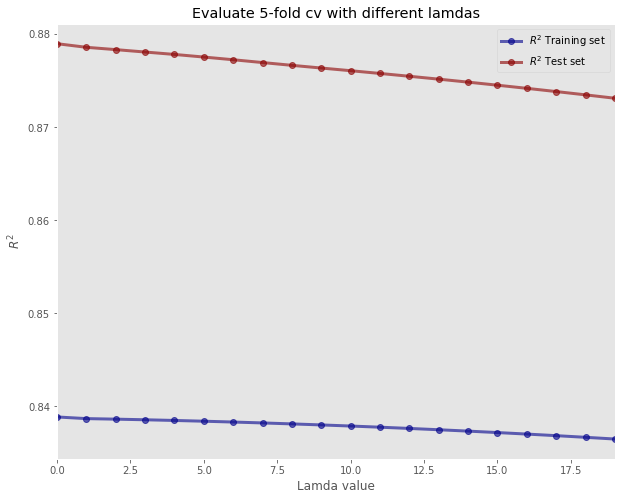

In [30]:
plt.figure(figsize=(10, 8))
plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", alpha=0.6, linewidth=3)
plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", alpha=0.6, linewidth=3)
plt.xlabel('Lamda value'); plt.ylabel(r'$R^2$')
plt.xlim(0, 19)
plt.title(r'Evaluate 5-fold cv with different lamdas')
plt.legend(loc='best')
plt.grid()

### Best Model

*Finally, store your test data results in a DataFrame and identify the lambda where the R^2 has it’s maximum value in the test data. Fit a Lasso model with this lambda parameter (use the training data) and obtain the corresponding regression coefficients. Furthermore, obtain the mean squared error for the test data of this model.*

In [31]:
df_lam = pd.DataFrame(test_r_squared*100, columns=['R_squared'])
df_lam['lambda'] = (lambdas)
# returns the index of the row where column has maximum value.
df_lam.loc[df_lam['R_squared'].idxmax()]

R_squared    87.897525
lambda        0.050000
Name: 0, dtype: float64

In [32]:
reg_best = Lasso(alpha = 0.144737)
reg_best.fit(X_train, y_train)

Lasso(alpha=0.144737)

In [34]:
Lasso(alpha=0.144737, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, reg_best.predict(X_test))

3.6351874909939625

In [35]:
reg_best.coef_

array([-0.34136411, -1.18223273, -0.        , -3.27132984,  0.        ,
        0.33262331,  0.71385488])